# Wine Quality Prediction üç∑
> Linear Regression

### Import libraries

In [1456]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, root_mean_squared_error

### Step 1 : Business understanding

In [1457]:
# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('WineQT.csv')
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

### Step 2: Data understanding

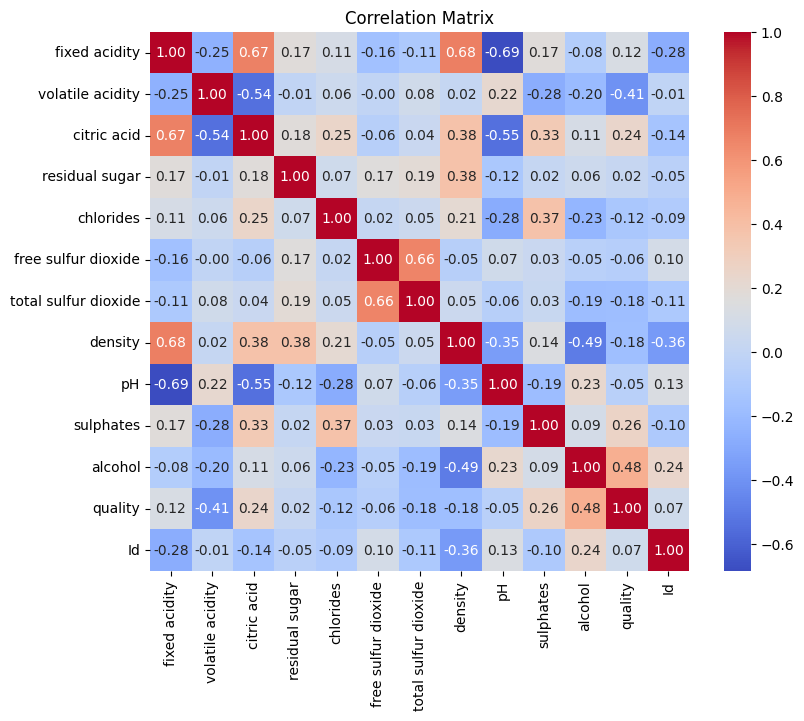

In [1458]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(9, 7))
plt.title("Correlation Matrix")
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)

plt.show()


‡∏à‡∏≤‡∏Å‡∏Å‡∏≤‡∏£‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå Correlation Matrix ‡∏û‡∏ö‡∏ß‡πà‡∏≤
1. correlation ‡∏Ç‡∏≠‡∏á free sulfur dioxide ‡πÅ‡∏•‡∏∞ total sulfer dioxide ‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡πÄ‡∏Å‡∏µ‡πà‡∏¢‡∏ß‡πÄ‡∏ô‡∏∑‡πà‡∏≠‡∏á‡∏Å‡∏±‡∏ô ‡∏ã‡∏∂‡πà‡∏á‡πÅ‡∏™‡∏î‡∏á‡πÉ‡∏´‡πâ‡πÄ‡∏´‡πá‡∏ô‡∏ß‡πà‡∏≤‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏õ‡πá‡∏ô ***multicollinearity*** ‡∏ó‡∏µ‡πà‡∏™‡∏∑‡πà‡∏≠‡∏ñ‡∏∂‡∏á‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏±‡∏°‡∏û‡∏±‡∏ô‡∏ò‡πå‡∏Å‡∏±‡∏ô‡∏™‡∏π‡∏á‡∏°‡∏≤‡∏Å ‡∏ã‡∏∂‡πà‡∏á‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏™‡πà‡∏á‡∏ú‡∏•‡∏Å‡∏£‡∏∞‡∏ó‡∏ö‡∏ï‡πà‡∏≠‡∏Å‡∏≤‡∏£‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡πÅ‡∏•‡∏∞‡∏Å‡∏≤‡∏£‡∏ï‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ú‡∏•‡∏•‡∏±‡∏û‡∏ò‡πå‡∏à‡∏≤‡∏Å‡πÇ‡∏°‡πÄ‡∏î‡∏•‡πÄ‡∏ß‡∏•‡∏≤‡∏ô‡∏≥‡πÑ‡∏õ‡πÄ‡∏ó‡∏£‡∏ô‡πÑ‡∏î‡πâ ‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡πÄ‡∏£‡∏≤‡∏ï‡πâ‡∏≠‡∏á‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏ï‡∏±‡∏î‡∏≠‡∏±‡∏ô‡πÉ‡∏î‡∏≠‡∏±‡∏ô‡∏´‡∏ô‡∏∂‡πà‡∏á‡∏≠‡∏≠‡∏Å ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏•‡∏î‡∏õ‡∏±‡∏ç‡∏´‡∏≤‡πÅ‡∏•‡∏∞‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ã‡∏±‡∏ö‡∏ã‡πâ‡∏≠‡∏ô‡∏Ç‡∏≠‡∏á‡πÇ‡∏°‡πÄ‡∏î‡∏• ‡∏ã‡∏∂‡πà‡∏á‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡πÄ‡∏≠‡∏≤ free sulfur dioxide ‡∏≠‡∏≠‡∏Å ‡πÄ‡∏û‡∏£‡∏≤‡∏∞ correlation ‡∏Å‡∏±‡∏ö target ‡∏°‡∏µ‡∏Ñ‡πà‡∏≤‡∏ô‡πâ‡∏≠‡∏¢‡∏Å‡∏ß‡πà‡∏≤ total sulfer dioxide

2. ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡∏ô‡∏≥ feature ‡∏ó‡∏µ‡πà‡∏°‡∏µ correlation ‡∏Å‡∏±‡∏ö target ‡∏ô‡πâ‡∏≠‡∏¢ ‡πÜ ‡∏≠‡∏≠‡∏Å‡∏î‡πâ‡∏ß‡∏¢ ‡∏ã‡∏∂‡πà‡∏á‡∏Ñ‡∏∑‡∏≠ residual sugar ‡πÅ‡∏•‡∏∞ pH ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏•‡∏î‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ã‡∏±‡∏ö‡∏ã‡πâ‡∏≠‡∏ô‡∏Ç‡∏≠‡∏á model ‡πÅ‡∏•‡∏∞‡∏ä‡πà‡∏ß‡∏¢‡∏•‡∏î‡πÇ‡∏≠‡∏Å‡∏≤‡∏™‡∏ó‡∏µ‡πà‡∏à‡∏∞‡πÄ‡∏Å‡∏¥‡∏î overfitting

3. ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏ó‡∏≥‡∏Å‡∏≤‡∏£‡∏ô‡∏≥ unique data (Id) ‡∏≠‡∏≠‡∏Å‡∏î‡πâ‡∏ß‡∏¢ ‡πÄ‡∏û‡∏£‡∏≤‡∏∞ ‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏±‡∏°‡∏û‡∏±‡∏ô‡∏ò‡πå‡∏Å‡∏±‡∏ö target ‡πÅ‡∏•‡∏∞‡∏ó‡∏≥‡πÉ‡∏´‡πâ model ‡∏ã‡∏±‡∏ö‡∏ã‡πâ‡∏≠‡∏ô‡∏Ç‡∏∂‡πâ‡∏ô‡πÄ‡∏õ‡∏•‡πà‡∏≤ ‡πÜ

### Step 3: Data preparation

‡πÉ‡∏ô‡∏Å‡∏≤‡∏£ cleansing data ‡πÄ‡∏£‡∏≤‡∏à‡∏∞‡∏ó‡∏≥‡∏ï‡∏≤‡∏°‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô‡∏ó‡∏µ‡πà‡πÄ‡∏£‡∏≤‡πÑ‡∏î‡πâ‡∏ß‡∏¥‡πÄ‡∏Ñ‡∏£‡∏≤‡∏∞‡∏´‡πå‡πÉ‡∏ô‡∏Ç‡∏±‡πâ‡∏ô‡∏ï‡∏≠‡∏ô data understanding ‡∏£‡∏ß‡∏°‡∏ñ‡∏∂‡∏á‡∏Å‡∏≤‡∏£‡πÄ‡∏ä‡πá‡∏Ñ missing value ‡πÅ‡∏•‡∏∞ duplicated value ‡∏î‡πâ‡∏ß‡∏¢

In [1459]:
df_cleaned = df.copy()

- ‡πÄ‡∏ä‡πá‡∏Ñ duplicated value

In [1460]:
print("Total duplicated value in dataset:", df_cleaned.duplicated().sum())

Total duplicated value in dataset: 0


- ‡πÄ‡∏ä‡πá‡∏Ñ missing value

In [1461]:
missing_summary = df.isnull().sum()
print("Total missing value in dataset\n")
print(missing_summary)

Total missing value in dataset

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


- ‡∏ô‡∏≥ feature ‡∏ó‡∏µ‡πà‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏Ñ‡∏ß‡∏≤‡∏°‡∏à‡∏≥‡πÄ‡∏õ‡πá‡∏ô‡∏≠‡∏≠‡∏Å

In [1462]:
df_cleaned = df_cleaned.drop(columns=['free sulfur dioxide', 'residual sugar', 'pH', 'Id'])
df_cleaned

fixed acidity  volatile acidity  citric acid  chlorides  \
0               7.4             0.700         0.00      0.076   
1               7.8             0.880         0.00      0.098   
2               7.8             0.760         0.04      0.092   
3              11.2             0.280         0.56      0.075   
4               7.4             0.700         0.00      0.076   
...             ...               ...          ...        ...   
1138            6.3             0.510         0.13      0.076   
1139            6.8             0.620         0.08      0.068   
1140            6.2             0.600         0.08      0.090   
1141            5.9             0.550         0.10      0.062   
1142            5.9             0.645         0.12      0.075   

      total sulfur dioxide  density  sulphates  alcohol  quality  
0                     34.0  0.99780       0.56      9.4        5  
1                     67.0  0.99680       0.68      9.8        5  
2                     54.0  0.99700       0.65      9.8        5  
3                     60.0  0.99800       0.58      9.8        6  
4                     34.0  0.99780       0.56      9.4        5  
...                    ...      ...        ...      ...      ...  
1138                  40.0  0.99574       0.75     11.0        6  
1139                  38.0  0.99651       0.82      9.5        6  
1140                  44.0  0.99490       0.58     10.5        5  
1141                  51.0  0.99512       0.76     11.2        6  
1142                  44.0  0.99547       0.71     10.2        5  

[1143 rows x 9 columns]

### Step 4: Modeling

- ‡∏Å‡∏≥‡∏´‡∏ô‡∏î X ‡πÅ‡∏•‡∏∞ y ‡∏à‡∏≤‡∏Å‡∏Ç‡πâ‡∏≠‡∏°‡∏π‡∏•‡∏ó‡∏µ‡πà‡∏ú‡πà‡∏≤‡∏ô‡∏Å‡∏≤‡∏£ cleaned ‡πÅ‡∏•‡πâ‡∏ß (set role)

In [1463]:
X = df_cleaned.drop(columns=['quality'])
y = df_cleaned['quality']

- Split data ‡πÄ‡∏õ‡πá‡∏ô training 80% ‡πÅ‡∏•‡∏∞ testing 20%

In [1464]:
# Split the data into training 80% and testing 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

- Apply model ‡πÅ‡∏•‡∏∞‡∏ó‡∏î‡∏™‡∏≠‡∏ö performance

In [1465]:
model = LinearRegression()

# Train the model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model on the test set
error = root_mean_squared_error(y_test, y_pred)
print(f"Performance error: {error}")

Performance error: 0.666949407109636


### Step 5: Evaluation Validation

‡πÉ‡∏ä‡πâ 10-fold Cross-Validation ‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ß‡∏±‡∏î‡∏õ‡∏£‡∏∞‡∏™‡∏¥‡∏ó‡∏ò‡∏¥‡∏†‡∏≤‡∏û‡∏Ç‡∏≠‡∏á model

In [1466]:
model = LinearRegression()
# Perform 10-fold cross-validation on the training set
rmse_scorer = make_scorer(root_mean_squared_error)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring=rmse_scorer)

print(f"RMSE (Cross-validation): {scores.mean()}")

RMSE (Cross-validation): 0.642681797345442


### Step 6: Deployment

‡∏™‡∏£‡∏∏‡∏õ‡∏†‡∏≤‡∏û‡∏£‡∏ß‡∏°‡∏Ç‡∏≠‡∏á‡∏ó‡∏±‡πâ‡∏á flow ‡πÅ‡∏•‡∏∞‡∏î‡∏π‡∏ú‡∏• prediction ‡∏Ç‡∏≠‡∏á model

RMSE-Cross-validation  : 0.6490588751054209
Performance error      : 0.6212396050750388


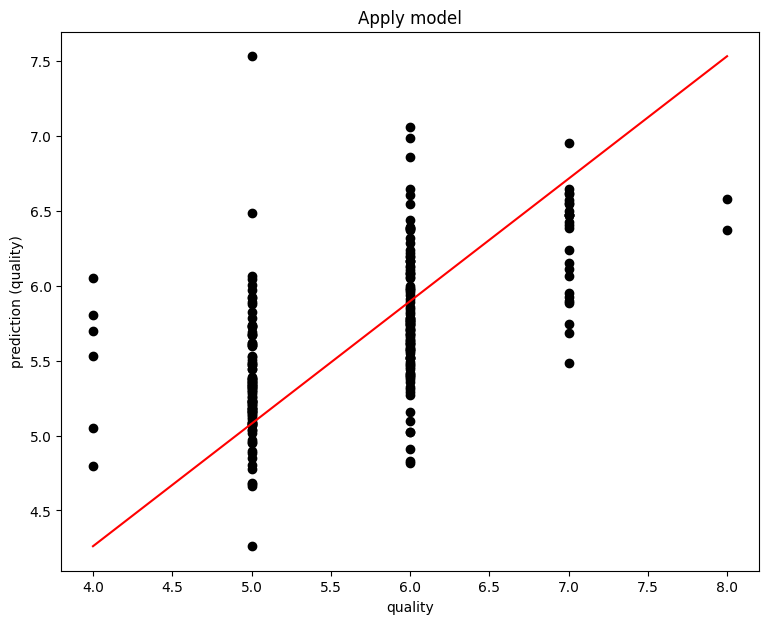

In [1467]:
model = LinearRegression()

X = df_cleaned.drop(columns=['quality'])
y = df_cleaned['quality']

# Split the data into training 80% and testing 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Perform 10-fold cross-validation on the training set
rmse_scorer = make_scorer(root_mean_squared_error)
scores = cross_val_score(model, X_train, y_train, cv=10, scoring=rmse_scorer)

print(f"RMSE-Cross-validation  : {scores.mean()}")

# Train the model on the entire training set
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model on the test set
mse_test = root_mean_squared_error(y_test, y_pred)
print(f"Performance error      : {mse_test}")

plt.figure(figsize=(9, 7))
plt.title("Apply model")
plt.xlabel("quality")
plt.ylabel("prediction (quality)")
plt.scatter(y_test, y_pred, c="black")
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], c="red")
plt.show()
